                        precision    recall  f1-score   support

                 ARSON       0.96      1.00      0.98       294
            BAD CHECKS       1.00      1.00      1.00        86
               BRIBERY       0.96      1.00      0.98        51
              BURGLARY       1.00      1.00      1.00      6678
    DISORDERLY CONDUCT       0.99      1.00      1.00       819
         DRUG/NARCOTIC       1.00      1.00      1.00      8998
          EMBEZZLEMENT       0.87      1.00      0.93       204
             EXTORTION       0.98      1.00      0.99        43
FORGERY/COUNTERFEITING       1.00      1.00      1.00      1729
                 FRAUD       1.00      1.00      1.00      2994
            KIDNAPPING       1.00      1.00      1.00       415
         LARCENY/THEFT       1.00      1.00      1.00     31593
        MISSING PERSON       1.00      1.00      1.00      4601
          NON-CRIMINAL       1.00      1.00      1.00     16662
        OTHER OFFENSES       1.00      

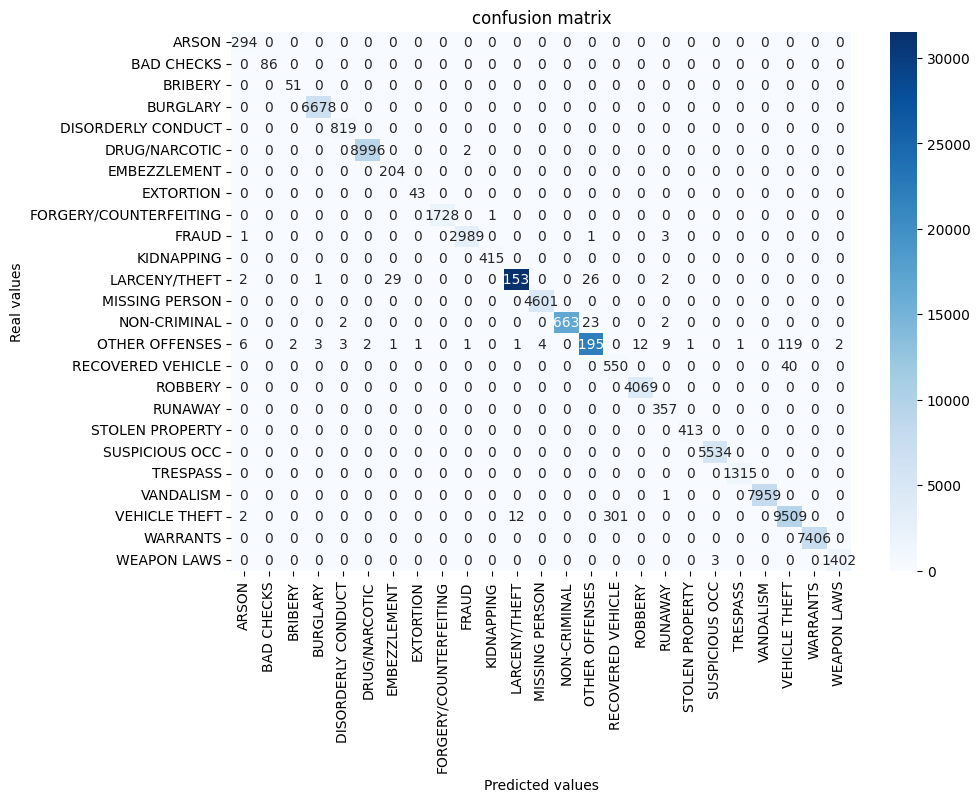

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

#  Load your file (Competition_Data.csv)
data = pd.read_csv("C:/Users/hamdi/Desktop/hamdi-code/Training python/Competition_Dataset.csv")  # Remplace avec ton fichier réel

#  Select useful columns/features
X = data["Descript"]  # Crime Description
y = data["Category"]  # Labels (categories)

# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#  pipeline (TF-IDF + Naïve Bayes)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred))


#  Detect overfitting : if Train Accuracy >> Test Accuracy => Overfitting
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names
classes = sorted(set(y_test))  # Get unique class names from the test set

# display with seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('confusion matrix')
plt.show()


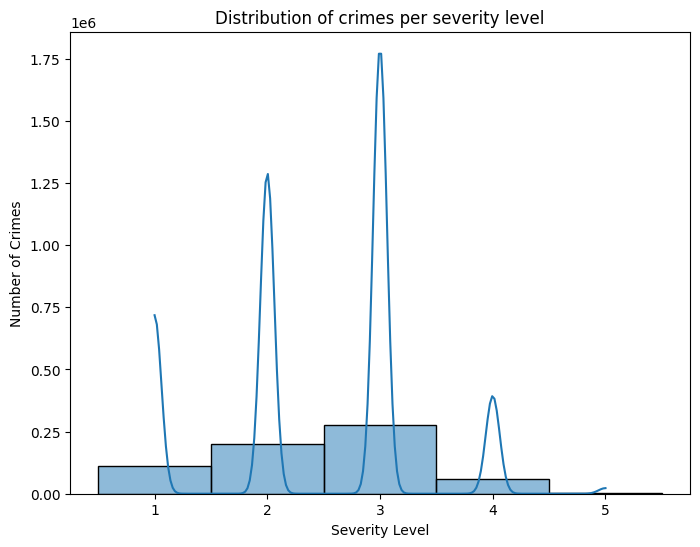

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
data = pd.read_csv("C:/Users/hamdi/Desktop/hamdi-code/Training python/Competition_Dataset.csv")  # Remplace par ton fichier réel

# Définir une fonction de mapping pour assigner une sévérité
def assign_severity(category):
    severity_mapping = {
        1: ["NON-CRIMINAL", "SUSPICIOUS OCCURRENCE", "MISSING PERSON", "RUNAWAY", "RECOVERED VEHICLE"],
        2: ["WARRANTS", "OTHER OFFENSES", "VANDALISM", "TRESPASS", "DISORDERLY CONDUCT", "BAD CHECKS"],
        3: ["LARCENY/THEFT", "VEHICLE THEFT", "FORGERY/COUNTERFEITING", "DRUG/NARCOTIC", "STOLEN PROPERTY", "FRAUD", "BRIBERY", "EMBEZZLEMENT"],
        4: ["ROBBERY", "WEAPON LAWS", "BURGLARY", "EXTORTION"],
        5: ["KIDNAPPING", "ARSON"]
    }
    
    for severity, categories in severity_mapping.items():
        if category in categories:
            return severity
    return None  # in case the category is not found

# Apply the mapping function to the 'Category' column
# and create a new 'Severity' column
data["Severity"] = data["Category"].apply(assign_severity)

# histogram of severity levels
plt.figure(figsize=(8, 6))
sns.histplot(data["Severity"], bins=5, kde=True, discrete=True)

plt.xlabel("Severity Level")
plt.ylabel("Number of Crimes")
plt.title("Distribution of crimes per severity level")
plt.xticks(range(1, 6))  # Set x-ticks to severity levels
plt.show()
